# Big project activity

## Optimal chargin station location

### 1.Introduction

Consider a long linear cycle path  as Vento, or the Danube cycle path. The cycle path usually runs along the banks of a river with scarse tourist interest. However, from the main course of the cycle path it is possible to reach places of tourist interest by making small detours.  

The rapid growth of e-bike ridership is proposing the problem of deploying a suitable charging infrastructure. The charging stations should be placed in strategic positions so as to guarantee a coverage of the whole cycle path. However, since the charging operations require a non negligible time, the charging station should be positioned in places where alternative activities could be carried out, as restaurants, museums, swimming pool, or other amenities. Moreover, the presence of a charging station could also induce e-cyclists to discover new places and generate positive externalities.



### 2.Decision problem
We can represent the cycle path as a graph where the set of nodes $H = \{1,\ldots,n\}$ corresponds to the tourist sites that may host a charging station.
In addition we are given the distances between touristic site ($d_{ij},$ with $ i,j =1,\ldots,n$). Let $c_i$ be the cost of installing a charging station in site $i, i=1\ldots,n$.


The problem is, given a budget $b$, determine the subset of sites $S\subseteq H$ where to install the charging stations so that the total cost is not higher than $b$ and the maximum distance between consecutive charging stations is minimized.
Consider that the cyclist has to visit all the touristic destination in a consecutive way.



### 3.Problem characteristics
There are 2 csv files that contain the information of the cycle way, they are essential to build the equivalent graph:


*    in the "nodes.csv" file there are all the destinations that the cyclist can reach, with their spatial coordinates and the value of installation costs related to that destination. Consider that the "tourist-dest-id" is not the graph node number but it is an unique id to identify the destination.
*   in the "OD.csv" you can find all the arcs between two different nodes, keep attention that the condition of visiting consecutive touristic destination must be respected.

The set of nodes $N$ is defined by $\{0,1,\ldots,n, n+1\}$.  The Arcs $A$ correspond to the portion of cycle path between two consecutive charging stations. We assume that potentially e-riders will visit all sites along the way making the suitable deviations and going back to the main path at the initial point of the detour.
The cost associated with each  arc $(i,j)$ is given by $c_j$, thus the cost of installing a charging station in $j$. These costs are defined for all arcs in $A$, while they are set to 0 for all the arcs that arrive in the last node.
The path starts in node $s = 0$ and ends in node $t = n+1$, these two nodes are connected to the nearest touristic site with an arc of null length.

### 4.Example of linear path with deviation
![picture](https://drive.google.com/uc?export=view&id=1w16bHtbu0FGGL-UntxeqxD7244D3eHbJ)

### 5.Requirements
The requirements of the problem are:


*   the maximum running time of the algorithm must be 5 minutes, so set the proper timer
*   create the equivalent graph and display it on a xy-plot
*   find the solution for the basic scenario, with a mip model, displaying the solution with a xy-plot, the budget constrain is $b = 10000\ € $.
*   Find the optimal solution for 5 different values of budget in the range $[10000, 100000]$. Select the values of the budget so as to have different charger locations.

  You have to motivate you choice and the solution you get. They can also be not common solution if they are well motivated. To support your decision and explanations you can print plots or tables. You can also compare different scenarios.


   
If you have some doubts related to the parametric analysis prof. Cubillos uploaded a notebook with the solution on WeBeeP and you can have a look there.

1) the nodes provided in "nodes.csv" are all touristic nodes, so destination ones. You can add charging station in every location except in the first and last node, like the small project.

2) the coloum total_cost is the distance between nodes, I have re-uploaded a new version of the file where it would be fixed.

3) see above, but remember to cope with the fact that the cyclist must visit every touristic location.

4) from the file you get the distance, than you have to create the equivalent graph and apply the requirements to solve the model.

5) you have to build the equivalent graph according to the coordinates, from there the consecutive nodes are the ones with the minimum distance between them. the destination ID are not related to the nodes of the graph, but it is useful to identify them.

### Insert student name and student ID

student1: Calvi Mirko

ID1: 955897

student2:

ID2:

student3

ID3:



In [1]:
#install libraries

!pip install mip
!pip install --upgrade cffi==1.15.0

In [2]:
#import libraries

import importlib
import cffi
importlib.reload(cffi)
import numpy as np
import math
import networkx as nx
import csv
import pandas as pd

In [3]:
#import the csv file

node_filepath='nodes.csv'
OD_filepath='OD.csv'

node_df=pd.read_csv(node_filepath, encoding='latin-1')
OD_df=pd.read_csv(OD_filepath)


starting the timer

In [4]:
#set the timer
import time

start_time=time.time()


plotting the cities location so to esteem wich is the first city and wich is the last


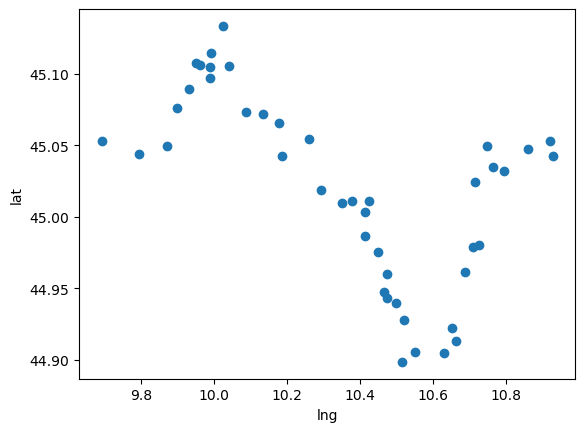

In [5]:
#plotting the graph of all nodes
import matplotlib.pyplot as plt

plt.scatter(node_df['x (longitude)'], node_df['y (latitude)'])
plt.xlabel("lng")
plt.ylabel("lat")

plt.show()

In [6]:
#plot network as ns graph
def plot_graph(V, A): # V = vertexes, A = arcs, 

    # Create a graph
    G = nx.Graph()

    # Add vertices to the graph
    G.add_nodes_from([i for i in V ])

    # Add edges to the graph
    G.add_edges_from(A)

    # Plot the graph
    point=[ [ 
              node_df.loc[i, 'x (longitude)'], 
              node_df.loc[i, 'y (latitude)'] 
            ] for i in V 
          ] 
    
    coord={i : point[i] for i in range(len(point))}
    nx.draw(G, pos=coord, node_size=20, node_color='skyblue', font_color='black', font_size=8)
    

def draw_solution(V, A, f):
    
    point=[ [ 
              node_df.loc[i, 'x (longitude)'], 
              node_df.loc[i, 'y (latitude)'] 
            ] for i in V 
          ] 
    coord={i : point[i] for i in range(len(point))}
    
    g = nx.Graph()

    # Draw the whole graph first: all nodes, all arcs, no highlighting
    g.add_nodes_from(V)
    g.add_edges_from([(i,j) for (i,j) in A])
    nx.draw(g, pos=coord, node_size=20, node_color='skyblue', font_color='black', font_size=8)
    
    # Reset the graph and add only the arcs that belong to the solution,
    # i.e. those for which the optimal value of the variable f[i,j] is nonzero
    g.clear()
    g.add_edges_from([(i,j) for (i,j) in A if f[i,j].x == True])
    nx.draw(g, pos=coord, width=2, edge_color='red', with_labels=True, node_size=80, node_color='skyblue', font_color='black', font_size=8)

def is_number_in_tuples(number, tuple_list):
    for (i,j) in tuple_list:
        if number in (i,j) and tuple_list[i,j].x == True:
            return True
    return False

def draw_stations(V, A, x):
    
    # Create a graph
    G = nx.Graph()

    # Add vertices to the graph
    G.add_nodes_from([i for i in V ])

    # Add edges to the graph
    G.add_edges_from(A)
    for i in V:
        if is_number_in_tuples(i, x) and i!=0 and i!=20:
            G.add_node(i, color="green" )
        else:
            G.add_node(i, color="skyblue")
    
    # Plot the graph
    point=[ [ 
              node_df.loc[i, 'x (longitude)'], 
              node_df.loc[i, 'y (latitude)'] 
            ] for i in V 
          ] 
    
    coord={i : point[i] for i in range(len(point))}
    node_colors = [G.nodes[n]['color'] for n in G.nodes]
    node_sizes = [120 if G.nodes[n]['color'] == 'green' else 80  for n in G.nodes]

    nx.draw(G, pos=coord, node_size=node_sizes, with_labels=True, node_color=node_colors, font_color='black', font_size=8)
    
    

Each city is a node, I didn't use the IDs given in the node.csv file but I renamed each node with its index in the dataframe

In [7]:
#define the set of nodes
V = [i for i in range(len(node_df))] #[0,1,2,3,...,n,n+1]
      
print("len(V)= "+str(len(V))+" -> so the nodes will go from 0 to "+str(len(V)-1))

len(V)= 44 -> so the nodes will go from 0 to 43


Now I map all the nodes to their original node.csv's ID, just for ease

In [8]:
#Vertexes -> map each tourist_dest_id to a new ID (new enumeration of nodes)
from_nodes_to_id={ i : node_df.at[i,"tourist_dest_id"] for i in V }
from_ids_to_node={ node_df.at[i,"tourist_dest_id"] : i for i in V }    
  
# dictionary mapping node distances
node_distances = {    #map nodes to their distance -> (node, node):distance  OSS: not (id,id):distance
                    ( from_ids_to_node[OD_df.at[i, "origin_id"]], 
                      from_ids_to_node[OD_df.at[i, "destination_id"]] ) 
                        : OD_df.at[i, "distance [m]"]
                    for i in range( len(OD_df)) if OD_df.at[i, "origin_id"] != OD_df.at[i, "destination_id"] 
                 }

A is the set of arcs, A will contain the arcs from each node to all the other nodes except him self

len(A)= 1892


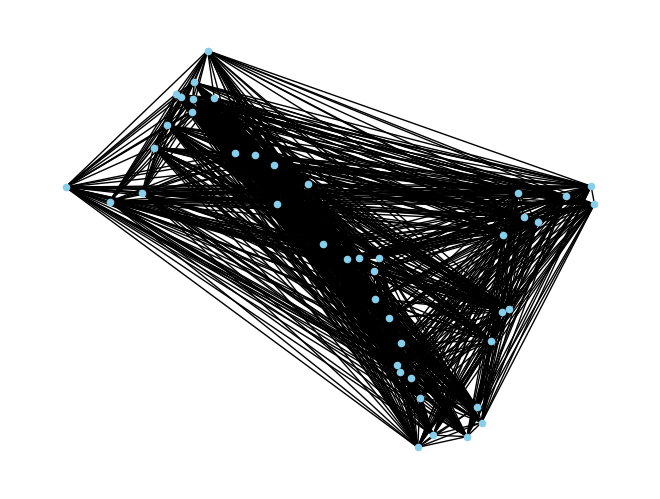

In [9]:
#define the set of edges                
A = [ #Arcs -> (start_ID, end_ID)
        (i,j)
            for (i,j) in node_distances
    ]
print("len(A)= "+str(len(A)))
plot_graph(V, A)

In [10]:
def cleaning_function(distances):
    
    res={}
    
    for i in V:
        temp={}
        for j in V:
            if (i, j) in A : 
                distance = distances.get((i, j))
                if distance is not None:
                    temp[(i, j)] = distance
               
        #sorting
        temp = dict(sorted(temp.items(), key=lambda item: item[1]))
        #print("---sorted temp : "+ str(temp))
        #adding the first two elements to res
        res.update(dict(list(temp.items())[:5]))
        temp={}
        
    #print("--------------------------------------------------------------")
    #print(res)
    return res
            
    

#node_distances=cleaning_function(node_distances)
    

In [11]:
def get_cycles(V, E, x):
  graph = [[] for i in V]

  for (i,j) in E:
    if x[i,j].x > 0.5:
      graph[i].append(j)
      graph[j].append(i)

  cycles = []
  color = [0 for i in V]
  par = [-1 for i in V]

  for i in V:
    if par[i] == -1:
      dfs_cycle(graph, cycles, i, -1, color, par)

  return [c for c in cycles if len(c) < len(V) and len(c) > 0]

def dfs_cycle(graph, cycles, u, p, color, par):
    # skil completely visited vertex.
    if color[u] == 2:
        return

    # If vertex has been seen but not completely visited -> cycle detected.
    # Backtrack based on parents to find the complete cycle.
    if color[u] == 1:
        v = []
        cur = p
        v.append(cur)

        # backtrack the vertex which are
        # in the current cycle thats found
        while cur != u:
            cur = par[cur]
            v.append(cur)

        cycles.append(v)
        return

    par[u] = p

    # partially visited.
    color[u] = 1

    # simple dfs on graph
    for v in graph[u]:
        # if it has not been visited previously
        if v == par[u]:
            continue
        dfs_cycle(graph, cycles, v, u, color, par)

    # completely visited.
    color[u] = 2

### shortest path

First I'll find the shortest path that visits all the touristic cities.




In [12]:
import mip
# Create model
m = mip.Model()

# define the variables
f={(i, j) : m.add_var(var_type=mip.BINARY, name="x{}{}".format(str(i), str(j))) for (i,j) in A}

#  define the contraints
s=0
t=20
b={ i : 0 for i in range(len(V)) }
b[s]=-1
b[t]=1

for i in V:
    if(i!=s and i!=t) :
        m.add_constr( mip.xsum(f[j,i] for j in V if (j,i) in A) + mip.xsum(f[i,j] for j in V if (i,j) in A) == 2)
    else:
        m.add_constr( mip.xsum(f[j,i] for j in V if (j,i) in A) + mip.xsum(f[i,j] for j in V if (i,j) in A) == 1)
    
    m.add_constr(  mip.xsum(f[j,i] for j in V if (j,i) in A) 
                 - mip.xsum(f[i,j] for j in V if (i,j) in A) == b[i])
    
    for j in V:
        if (j,i) in A and (i,j) in A: 
            m.add_constr(f[i,j] + f[j,i] <= 1)
    
# optimize objective function
m.objective = mip.minimize(mip.xsum(node_distances[i,j] * f[i,j] for (i,j) in A))
m.optimize()


<OptimizationStatus.OPTIMAL: 0>

checking the presence of cycles and deleting them by adding the necessary constraints

In [13]:
cycles = get_cycles(V, A, f)
print(len(cycles))
print(cycles)
while len(cycles) > 0:
  cycle = cycles.pop() #subarray of nodes where a cycle is present
  cycle_edges = [f[i,j] for (i,j) in A if i in cycle and j in cycle] #
  c = m.add_constr(mip.xsum(cycle_edges) <= len(cycle) - 1)
  print("Added constr:")
  print(c)
  m.optimize()
  cycles = get_cycles(V, A, f)

1
[[37, 36, 35]]
Added constr:
constr(1980): +1.0 x3536 +1.0 x3537 +1.0 x3635 +1.0 x3637 +1.0 x3735 +1.0 x3736 <= 2.0


In [14]:
cycles = get_cycles(V, A, f)
print(len(cycles))
print(cycles)

0
[]


## The final lenght of the cyclepath resuts to be:

lenght: 238507.2281967 [m]


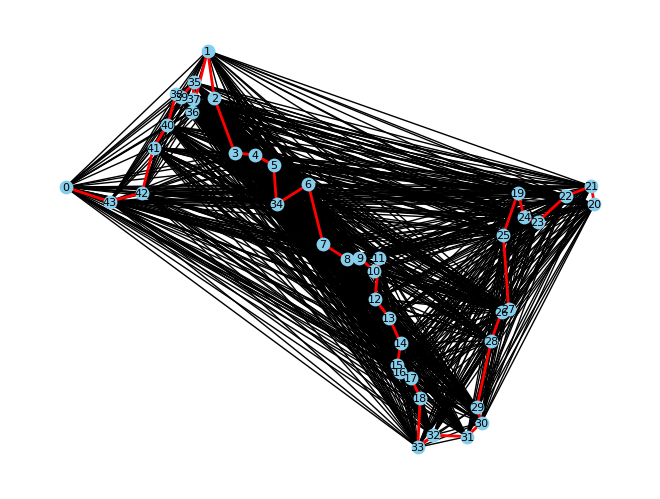

In [15]:
print("lenght: "+str(m.objective_value)+ " [m]")
draw_solution(V, A, f)

### charging station optimization

First of all I'll reduce A to only the arcs that are forming the shortest path that visits all the cities

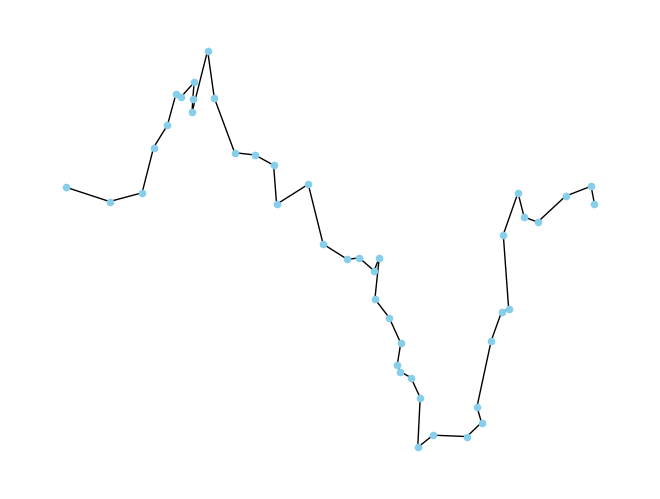

In [16]:
def shortest_path_only(f, node_distances):
    shotest_path=[(i,j) for (i,j) in f if f[i,j].x==True]
    shortest_distances={(i,j) : node_distances[i,j] for (i,j) in shotest_path}
    return shotest_path, shortest_distances

A_sp, node_distances_sp = shortest_path_only(f, node_distances)

plot_graph(V, A_sp)
#print(V)
#print(A)
#print(node_distances)
    

Now that i only have only one path I'll track the order of the nodes.  


In [17]:
def get_next(A, prev):
    for arc in A:
        if arc[0] == prev:
            return arc[1]
            
def new_node_sequence(V,A):
    
    #calculating new node distances
    new_node_distances={}
    node_sequence=[]
    
    start=0
    end=20
    count=0
    prev=start
    next=get_next(A, prev)
    node_sequence.append(prev)
    while( prev != end):
        temp=prev
        prev=next
        next=get_next(A, next)
        node_sequence.append(prev)
        
    print(node_sequence)
    
    return node_sequence

#V shortest path
V_sp=new_node_sequence(V,A_sp)

[0, 43, 42, 41, 40, 38, 39, 35, 37, 36, 1, 2, 3, 4, 5, 34, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 33, 32, 31, 30, 29, 28, 26, 27, 25, 19, 24, 23, 22, 21, 20]


In [18]:
def get_nodes_distance(V, start_node, end_node, node_distances):
    
    if start_node not in V or end_node not in V :
        return null
    
    start=V.index(start_node)
    end=V.index(end_node)
    
    #print("st node: ", start_node, "start: ", start, "end node: ", end_node, " end: ", end)
    
    if (end < start ):
        #print("..........................................")
        temp=start
        start=end
        end=temp

    dist=0
    for i in range(start, end):
        dist+=node_distances[V[i], V[i+1]]
        #print(V[i], V[i+1], node_distances[V[i], V[i+1]])
    
    return dist

In [19]:
from tabulate import tabulate

def chargingStations_model(nodes, edges, budget, nodes_cost, distances):
   # Create model
    m = mip.Model()
    
    # define the variables
    x = {(i,j): m.add_var(var_type=mip.BINARY) for (i,j) in edges}
    D = m.add_var(var_type=mip.CONTINUOUS)

    #  define the contraints
    b = {i : 0 for i in nodes}
    b[0] = 1
    b[nodes[-1]] = -1

    for i in nodes:
        m.add_constr(mip.xsum(x[i,j] for j in nodes if (i,j) in edges) -   # Outgoing flow from i
                     mip.xsum(x[j,i] for j in nodes if (j,i) in edges) ==  # Incoming flow into i
                     b[i])
        if i != nodes[0]:
          m.add_constr(mip.xsum(x[i,j] for j in nodes if (i,j) in edges) <= 1)
        if i != nodes[-1]:
          m.add_constr(mip.xsum(x[j,i] for j in nodes if (j,i) in edges) <= 1)

    m.add_constr(mip.xsum(nodes_cost[i]*x[i,j] for (i,j) in x) -  nodes_cost[0] <= budget)
    m.add_constr(mip.xsum(nodes_cost[i]*x[i,j] for (i,j) in x) >= 0.1)

    m.add_constr(D <= 50000 )
    
    for (i, j) in x:
      m.add_constr(get_nodes_distance( nodes, i, j, distances )  * x[i, j] <= D)

    # optimize objective function

    m.objective = mip.minimize(D)
    m.optimize()
    
    return m, x, D

def get_intallation_costs(V, node_df):
    res={}
    for i in V:
        id=from_nodes_to_id[i]
        res[i]=node_df.loc[node_df["tourist_dest_id"]==id, "Cost_of_installation []"].iloc[0]
    
    return res

def print_result(x, model):
    tot_cost=0
    data=[] 
    headers=["arcs", "from", "to", "cost", "distance"]
    for (i,j) in x :
        if x[i,j].x >= 0.5 :
            id=from_nodes_to_id[i]
            city1=node_df.loc[node_df["tourist_dest_id"]==id, "Comune"].iloc[0]
            id=from_nodes_to_id[j]
            city2=node_df.loc[node_df["tourist_dest_id"]==id, "Comune"].iloc[0]
            #print((i,j), city1, "->", city2, "\033[1m cost: \033[0m", costs[j], "\033[1m distance: \033[0m", get_nodes_distance(V_sp, i, j, node_distances))
            #print(f"{i:2.0f},{j:2.0f} , {city1}->{city2} \033[1m cost: \033[0m{costs[j]:5f}\033[1m distance: \033[0m{get_nodes_distance(V_sp, i, j, node_distances)}")
            data.append(((i,j), city1, city2, costs[j], get_nodes_distance(V_sp, i, j, node_distances)))
            tot_cost+=costs[i]
    print(tabulate(data, headers=headers, tablefmt="grid"))
    tot_cost-=costs[0]
    print("\033[1m MAXIMUM DISTANCE \033[0m:",model.objective_value)
    print("\033[1mTOTAL COST: \033[0m", tot_cost)  
    
    return model.objective_value, tot_cost


In [20]:
results = {}

budget=10000
costs=get_intallation_costs(V, node_df)
model, x, D= chargingStations_model (V_sp, A, budget, costs, node_distances)


+----------+--------------------+--------------------+--------+------------+
| arcs     | from               | to                 |   cost |   distance |
+==========+====================+====================+========+============+
| (0, 42)  | Piacenza           | Caorso             |   1520 |    29832.5 |
+----------+--------------------+--------------------+--------+------------+
| (2, 34)  | Gerre de' Caprioli | San Daniele Po     |   1533 |    31678.1 |
+----------+--------------------+--------------------+--------+------------+
| (11, 32) | Casalmaggiore      | Boretto            |   1700 |    38124.8 |
+----------+--------------------+--------------------+--------+------------+
| (25, 20) | Suzzara            | San Benedetto Po   |   1972 |    33385.2 |
+----------+--------------------+--------------------+--------+------------+
| (32, 25) | Boretto            | Suzzara            |   1544 |    38228.5 |
+----------+--------------------+--------------------+--------+------------+

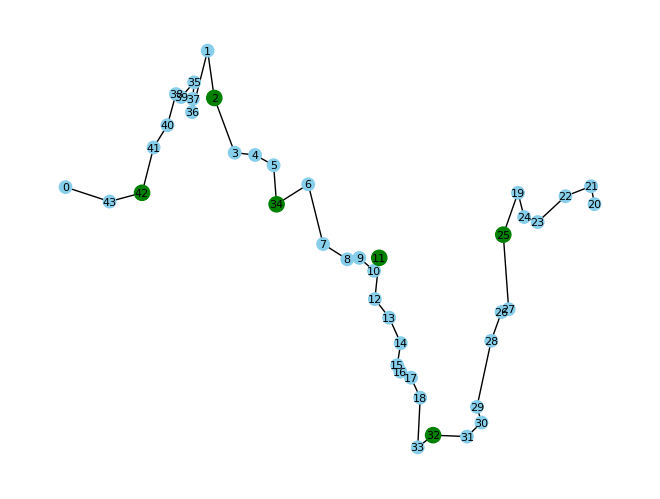

In [21]:
max_dist, cost = print_result(x, model)
results[budget]=(max_dist, cost)
draw_stations(V, A_sp, x)

+----------+------------------------+------------------------+--------+------------+
| arcs     | from                   | to                     |   cost |   distance |
+==========+========================+========================+========+============+
| (0, 43)  | Piacenza               | Piacenza               |   1824 |    16011.2 |
+----------+------------------------+------------------------+--------+------------+
| (2, 4)   | Gerre de' Caprioli     | Pieve d'Olmi           |   1621 |    21749.5 |
+----------+------------------------+------------------------+--------+------------+
| (4, 6)   | Pieve d'Olmi           | Motta Baluffi          |   1845 |    17917   |
+----------+------------------------+------------------------+--------+------------+
| (6, 10)  | Motta Baluffi          | Casalmaggiore          |   1686 |    21044.5 |
+----------+------------------------+------------------------+--------+------------+
| (10, 15) | Casalmaggiore          | Casalmaggiore          |   

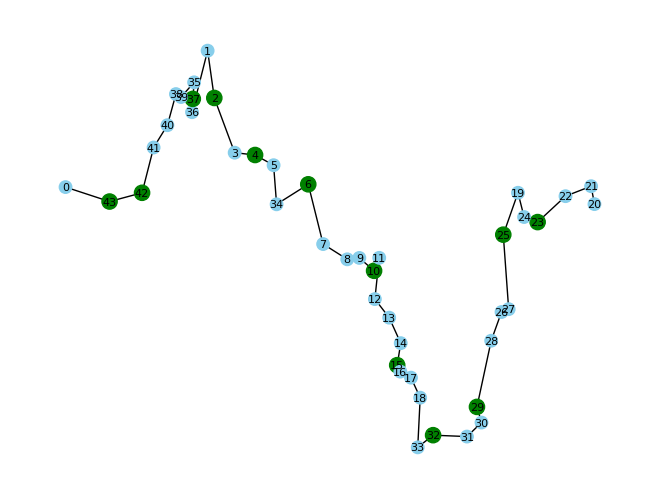

In [22]:
# parametric analysis

budget = 20000

model, x, D= chargingStations_model (V_sp, A, budget, costs, node_distances)
max_dist, cost = print_result(x,model)

#adding the result to the results array
results[budget]=(max_dist, cost)

draw_stations(V, A_sp, x)

+----------+------------------------+------------------------+--------+------------+
| arcs     | from                   | to                     |   cost |   distance |
+==========+========================+========================+========+============+
| (0, 43)  | Piacenza               | Piacenza               |   1824 |   16011.2  |
+----------+------------------------+------------------------+--------+------------+
| (2, 3)   | Gerre de' Caprioli     | Stagno Lombardo        |   1969 |   12188.5  |
+----------+------------------------+------------------------+--------+------------+
| (3, 5)   | Stagno Lombardo        | San Daniele Po         |   1796 |   15171.6  |
+----------+------------------------+------------------------+--------+------------+
| (5, 6)   | San Daniele Po         | Motta Baluffi          |   1845 |   12306.4  |
+----------+------------------------+------------------------+--------+------------+
| (6, 8)   | Motta Baluffi          | Gussola                |   

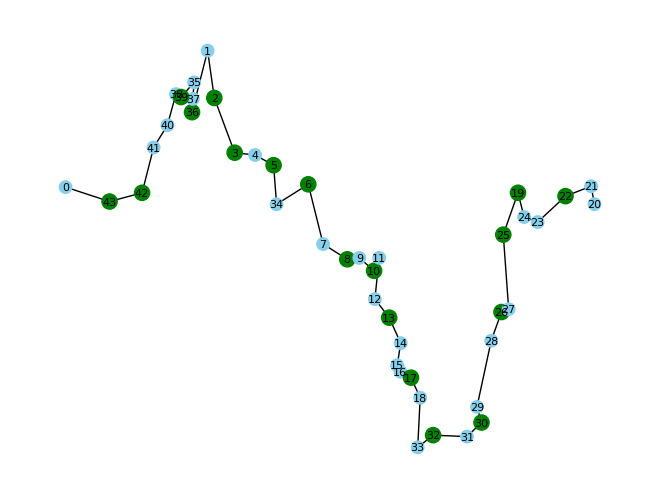

In [23]:
#budget = 30k
budget = 30000

model, x, D= chargingStations_model (V_sp, A, budget, costs, node_distances)
max_dist, cost = print_result(x,model)

#adding the result to the results array
results[budget]=(max_dist, cost)

draw_stations(V, A_sp, x)

+----------+------------------------+------------------------+--------+------------+
| arcs     | from                   | to                     |   cost |   distance |
+==========+========================+========================+========+============+
| (0, 43)  | Piacenza               | Piacenza               |   1824 |   16011.2  |
+----------+------------------------+------------------------+--------+------------+
| (2, 3)   | Gerre de' Caprioli     | Stagno Lombardo        |   1969 |   12188.5  |
+----------+------------------------+------------------------+--------+------------+
| (3, 5)   | Stagno Lombardo        | San Daniele Po         |   1796 |   15171.6  |
+----------+------------------------+------------------------+--------+------------+
| (5, 34)  | San Daniele Po         | San Daniele Po         |   1533 |    4317.97 |
+----------+------------------------+------------------------+--------+------------+
| (6, 8)   | Motta Baluffi          | Gussola                |   

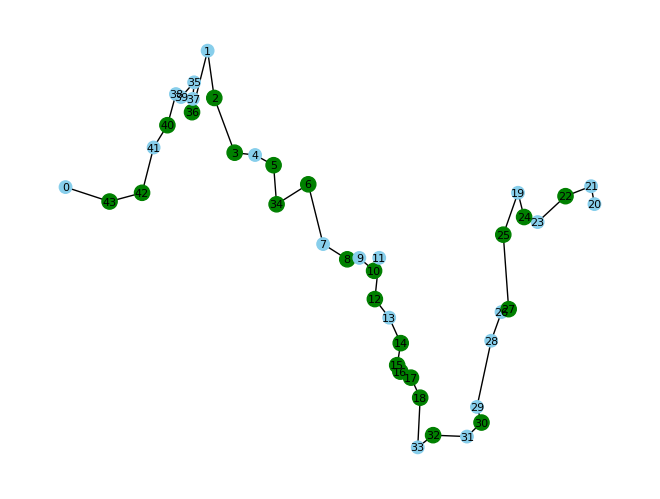

In [24]:
#budget = 40k
budget = 40000

model, x, D= chargingStations_model (V_sp, A, budget, costs, node_distances)
max_dist, cost = print_result(x,model)

#adding the result to the results array
results[budget]=(max_dist, cost)

draw_stations(V, A_sp, x)


+----------+------------------------+------------------------+--------+------------+
| arcs     | from                   | to                     |   cost |   distance |
+==========+========================+========================+========+============+
| (0, 43)  | Piacenza               | Piacenza               |   1824 |   16011.2  |
+----------+------------------------+------------------------+--------+------------+
| (1, 2)   | Cremona                | Gerre de' Caprioli     |   1559 |    7024.78 |
+----------+------------------------+------------------------+--------+------------+
| (2, 3)   | Gerre de' Caprioli     | Stagno Lombardo        |   1969 |   12188.5  |
+----------+------------------------+------------------------+--------+------------+
| (3, 4)   | Stagno Lombardo        | Pieve d'Olmi           |   1621 |    9561.01 |
+----------+------------------------+------------------------+--------+------------+
| (4, 34)  | Pieve d'Olmi           | San Daniele Po         |   

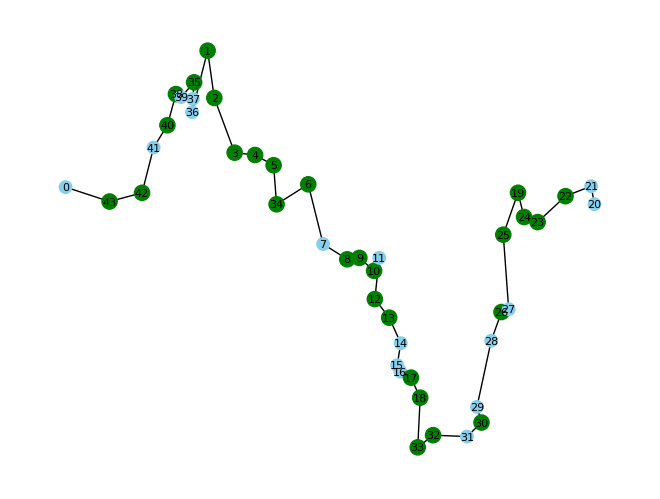

In [25]:
#budget = 50k
budget = 50000

model, x, D= chargingStations_model (V_sp, A, budget, costs, node_distances)
max_dist, cost = print_result(x,model)

#adding the result to the results array
results[budget]=(max_dist, cost)

draw_stations(V, A_sp, x)

+----------+------------------------+------------------------+--------+------------+
| arcs     | from                   | to                     |   cost |   distance |
+==========+========================+========================+========+============+
| (0, 43)  | Piacenza               | Piacenza               |   1824 |   16011.2  |
+----------+------------------------+------------------------+--------+------------+
| (2, 3)   | Gerre de' Caprioli     | Stagno Lombardo        |   1969 |   12188.5  |
+----------+------------------------+------------------------+--------+------------+
| (3, 4)   | Stagno Lombardo        | Pieve d'Olmi           |   1621 |    9561.01 |
+----------+------------------------+------------------------+--------+------------+
| (4, 34)  | Pieve d'Olmi           | San Daniele Po         |   1533 |    9928.61 |
+----------+------------------------+------------------------+--------+------------+
| (7, 9)   | Torricella del Pizzo   | Martignana di Po       |   

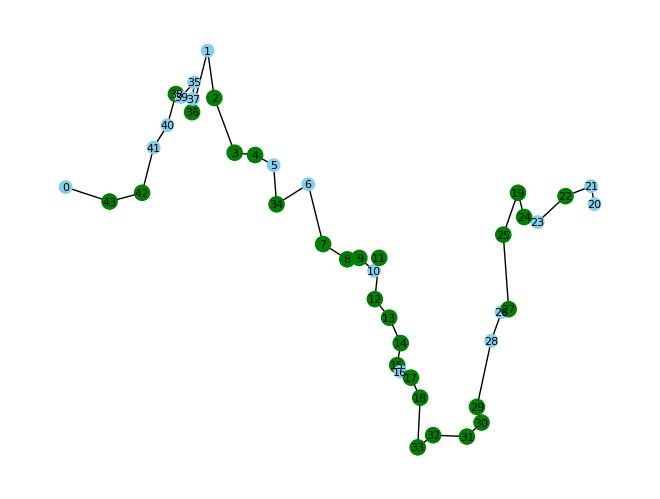

In [26]:
#budget = 100k
budget = 100000

model, x, D= chargingStations_model (V_sp, A, budget, costs, node_distances)

#adding the result to the results array
max_dist, cost = print_result(x,model)
results[budget]=(max_dist, cost)

draw_stations(V, A_sp, x)


In [27]:
#stopping the timer
    
end_time=time.time()

print("TOTAL TIME : ",end_time-start_time)


TOTAL TIME :  45.66460299491882


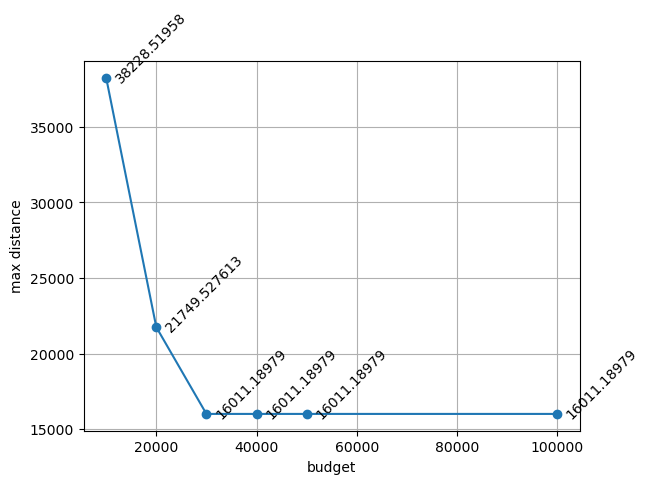

Budget   Max Distance    Expenses  
10000    38228.51958     9506      
20000    21749.527613    19834     
30000    16011.18979     29892     
40000    16011.18979     38906     
50000    16011.18979     47368     
100000   16011.18979     47360     


In [28]:
keys = list(results.keys())
values_distance = list(val[0] for val in results.values())

# Plot the points
plt.plot(keys, values_distance, marker='o', linestyle='-')

# Annotate each point with its key
for key, value in results.items():
    plt.annotate(str(value[0]), xy=(key, value[0]), xytext=(5, -3), textcoords='offset points', rotation=45)

# Add labels and title
plt.xlabel('budget')
plt.ylabel('max distance')

plt.grid(True)
# Show the plot
plt.show()

print("Budget".ljust(8), "Max Distance".ljust(15), "Expenses".ljust(10))

# Iterate over dictionary items and print values in columns
for key, value in results.items():
    budget = str(key).ljust(8)
    max_distance = str(value[0]).ljust(15)
    expenses = str(value[1]).ljust(10)
    print(budget, max_distance, expenses)

# conclusions

As we can see from the above diagramm, when we go over 30k of budget the max distance between two stations doesn't chance.
This because the stations 0 and 43 are consecutive stations and they are already have been chosen to minimize the max distance between charging stations, but they are also the furthest consecutive stations. 

To be more precise the budget spent is of 29892 euros.
